C:\Users\seccolev\AppData\Local\Temp\ipykernel_17800\1479182269.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(r"../../../data\raw\UV\OFV_TOPTOPO_CdSe2.txt", sep="\t", header=None, skiprows=19, decimal=',', skipfooter=47)


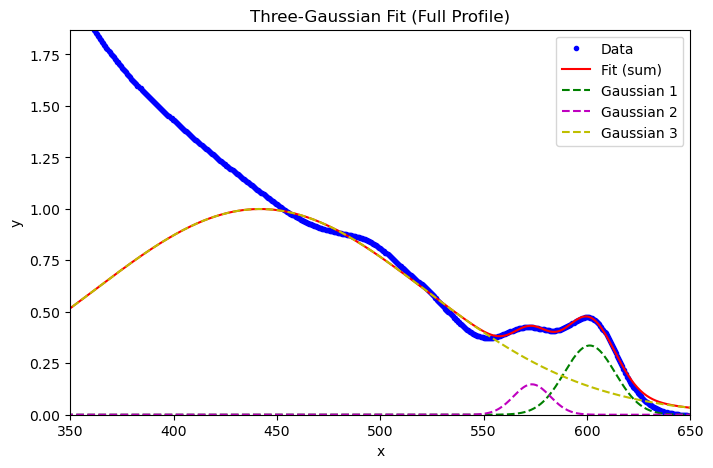

In [119]:
import numpy as np
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt

# Function to model sum of three Gaussians
def three_gaussians(x, a1, mu1, sigma1, a2, mu2, sigma2, a3, mu3, sigma3):
    return (a1 * np.exp(-(x - mu1)**2 / (2 * sigma1**2)) +
            a2 * np.exp(-(x - mu2)**2 / (2 * sigma2**2)) +
            a3 * np.exp(-(x - mu3)**2 / (2 * sigma3**2)))

# Load data from txt file (assume two columns: x and y)
import pandas as pd

data = pd.read_csv(r"../../../data\raw\UV\OFV_TOPTOPO_CdSe2.txt", sep="\t", header=None, skiprows=19, decimal=',', skipfooter=47)
x_data, y_data = data[0].values, data[1].values


# Select interval for fitting (change as needed)
interval = (x_data > 460) & (x_data < 620)
x_fit = x_data[interval]
y_fit = y_data[interval]

# Initial guesses for parameters: [a1, mu1, sigma1, a2, mu2, sigma2, a3, mu3, sigma3]
# You may need to adjust these based on your data
initial_guesses = [
    y_fit.max(), 610, 1,
    y_fit.max()/2, 580 , 1,
    y_fit.max()/3, 500, 80
]

lower_bounds = [-np.inf] * 9
upper_bounds = [ np.inf] * 9

# Set bounds only for sigma3 (index 8)
lower_bounds[8] = 80
upper_bounds[8] =100

# Fit the data
popt, pcov = curve_fit(three_gaussians, x_fit, y_fit, p0=initial_guesses,
                       bounds=(lower_bounds, upper_bounds))

plt.figure(figsize=(8, 5))
plt.plot(x_data, y_data, 'b.', label='Data')

# Extended smooth x-range
x_smooth = np.linspace(x_data.min(), x_data.max(), 1000)

# Plot full Gaussian model and components
plt.plot(x_smooth, three_gaussians(x_smooth, *popt), 'r-', label='Fit (sum)')
plt.plot(x_smooth, popt[0] * np.exp(-(x_smooth - popt[1])**2 / (2 * popt[2]**2)), 'g--', label='Gaussian 1')
plt.plot(x_smooth, popt[3] * np.exp(-(x_smooth - popt[4])**2 / (2 * popt[5]**2)), 'm--', label='Gaussian 2')
plt.plot(x_smooth, popt[6] * np.exp(-(x_smooth - popt[7])**2 / (2 * popt[8]**2)), 'y--', label='Gaussian 3')

plt.xlim(350, 650)
plt.ylim(0, y_data.max() * 0.5)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Three-Gaussian Fit (Full Profile)')
plt.show()


In [118]:
popt

array([3.47680458e-01, 5.96633433e+02, 2.23810201e+01, 9.36786223e-01,
       4.56457840e+02, 6.69728791e+01, 5.39474939e-02, 5.04719357e+02,
       1.20000000e+01])

In [70]:
# Calculate the three individual Gaussian peaks using the fitted parameters on the smooth x range
# Define a new, wider x range for plotting the fitted profile
x_fit_wide = np.linspace(x_data.min(), x_data.max(), 500)
gaussian1 = popt[0] * np.exp(-(x_fit_wide - popt[1])**2 / (2 * popt[2]**2))
gaussian2 = popt[3] * np.exp(-(x_fit_wide - popt[4])**2 / (2 * popt[5]**2))
gaussian3 = popt[6] * np.exp(-(x_fit_wide - popt[7])**2 / (2 * popt[8]**2))
profile = gaussian1 + gaussian2 + gaussian3

# y_smooth is the fitted profile
y_smooth = profile

# Create a DataFrame for export
export_df = pd.DataFrame({
    'x_smooth': x_fit_wide,
    'y_smooth': y_smooth,
    'gaussian1': gaussian1,
    'gaussian2': gaussian2,
    'gaussian3': gaussian3,
    'profile': profile
})
export_df
# Export to CSV
export_df.to_csv(r"../../../data\processed\UV\three_gaussian_fit_export.csv", index=False)

<Figure size 1000x600 with 0 Axes>

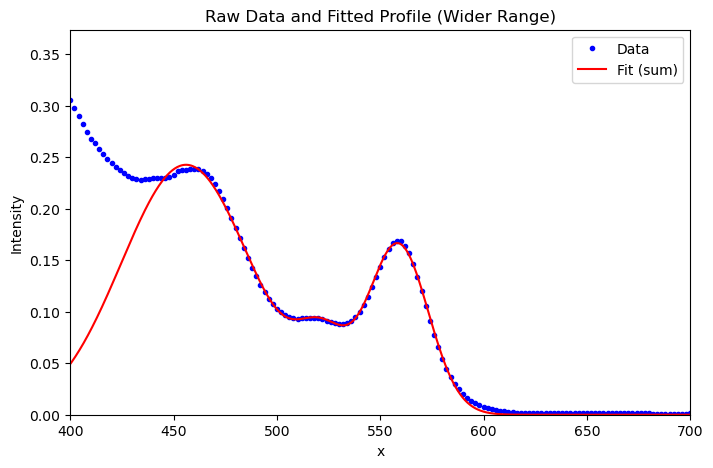

In [68]:
# Define a new, wider x range for plotting the fitted profile
x_fit_wide = np.linspace(x_data.min(), x_data.max(), 500)

# Calculate the fitted profile on the new x range
profile_wide = three_gaussians(x_fit_wide, *popt)

# Plot raw data and the fitted profile on the wider x range
plt.figure(figsize=(10, 6))
plt.figure(figsize=(8, 5))
plt.plot(x_data, y_data, 'b.', label='Data')

# Extended smooth x-range
x_smooth = np.linspace(x_data.min(), x_data.max(), 1000)

# Plot full Gaussian model and components
plt.plot(x_smooth, three_gaussians(x_smooth, *popt), 'r-', label='Fit (sum)')

plt.xlim(x_data.min()+100, x_data.max())
plt.ylim(0, y_data.max() * 0.5)	
plt.xlabel('x')
plt.ylabel('Intensity')
plt.title('Raw Data and Fitted Profile (Wider Range)')
plt.legend()
plt.show()

In [82]:
print(popt[1], popt[4])

558.6046323230727 521.9529576051158


In [85]:
print(-1240/(popt[1])+1240/popt[4], 1240/popt[1]) 

0.15587612935914663 2.2198168941836447
